In [7]:
import pandas as pd
import numpy as np
import boto3
from s3 import get_file
import re

In [280]:
s3 = boto3.resource('s3')
#lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='0320_2020_nlp.csv')
greatest_audio_features = get_file(s3,'s3ssp',download_file='Analysis_Data/greatest_audio_features_track_uri.csv'
                          ,rename_file='greatest_audiofeatures_nlp.csv')

greatest_albums = get_file(s3,'s3ssp',download_file='Analysis_Data/greatest_playlist_tracks.csv'
                          ,rename_file='greatest_playlist_tracks.csv')

master_audio_features = get_file(s3,'s3ssp',download_file='Analysis_Data/master_audiofeatures_track_uri.csv'
                          ,rename_file='master_audiofeatures_t.csv')

In [281]:
df_master = pd.read_csv(audio_features,sep='|',encoding='utf-8')
df_master = df_master.drop(columns=['artist_uri','artist_name','album_uri','track_name'])
df_greatest_audio_features = pd.read_csv(greatest_audio_features,sep='|',encoding='utf-8')


df = pd.concat([df_master, df_greatest], join="inner")

In [288]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000,514095.000000
mean,0.513205,0.537802,5.194989,-10.783876,0.700845,0.077568,0.428695,0.211251,0.239302,0.487657,118.637347,3.853301
std,0.172374,0.265581,3.523386,5.504362,0.457888,0.115159,0.362231,0.337213,0.226676,0.264647,30.225553,0.512020
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395000,0.325000,2.000000,-13.375000,0.000000,0.033700,0.052700,0.000005,0.099600,0.268000,96.018000,4.000000
50%,0.522000,0.549000,5.000000,-9.643000,1.000000,0.042800,0.374000,0.001870,0.136000,0.486000,117.543000,4.000000
75%,0.638000,0.762000,8.000000,-6.879000,1.000000,0.066400,0.795000,0.353000,0.297000,0.704000,136.921000,4.000000
max,0.992000,1.000000,11.000000,4.246000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,247.961000,5.000000


In [289]:
df_playlist = df.copy()
df_playlist = df_playlist[(df_playlist['instrumentalness']<=.95)].drop_duplicates('track_uri')
df_playlist.head()

,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7cVA2h2HRlE2mOxhXEmtro,0.503,0.656,2,-4.768,1,0.0315,0.236,0.836,0.3550,0.472,130.073,4
1,5N6IdYnIYaATgQKHg9CZJP,0.258,0.540,0,-6.730,1,0.0288,0.220,0.789,0.0754,0.436,83.048,4
2,2Fz3MpPkiUPEH6d4Heuipp,0.595,0.634,7,-7.057,1,0.0303,0.783,0.747,0.0989,0.489,108.009,4
3,4yDo6bylEHQMbAaXLKSvwl,0.334,0.744,2,-5.317,1,0.0370,0.576,0.771,0.0860,0.639,169.865,3
4,1kgKtxtHLvRPrmvX8ns79t,0.724,0.636,2,-6.874,1,0.0310,0.673,0.833,0.1230,0.679,129.989,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b9c8cbc90>,
      dtype=object)

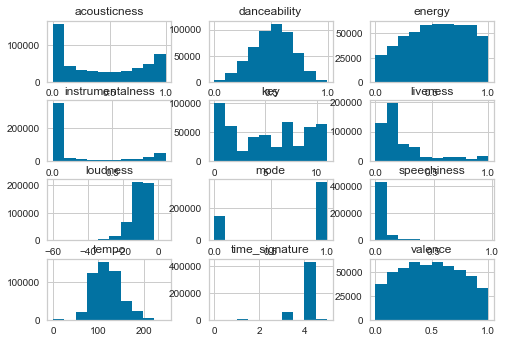

In [290]:
df_playlist.hist()

In [291]:
#Append to Pandas
#numpy_train_dataset = np.empty(0, dtype=object, order='C')

In [292]:
%%time
df_ideal_playlist = df_playlist
train = round(501333 * .8)

#Break into chunks
import random
i = 0
master_ideal_track_audiofeatures=[]


#Convert df into numpy
list_track_uri = df_ideal_playlist['track_uri'].to_numpy(dtype=object, copy=True)




#Cycle - is how many times around the loop
cycle = train

#test = 1000
for x in range(train):
    #Split list_track_uri into chunks by cycle amount
    numpy_ideal_playlist = np.random.choice(list_track_uri, size=(20), replace=False)
    for track in numpy_ideal_playlist:
        master_ideal_track_audiofeatures.append({'playlist':f'playlist{x}','track_uri':track})

CPU times: user 1h 20min 42s, sys: 18 s, total: 1h 21min
Wall time: 1h 21min 31s


In [293]:
df_only_tracks = pd.DataFrame(master_ideal_track_audiofeatures)#.drop_duplicates([0]).describe()

In [294]:
df_only_tracks

,playlist,track_uri
0,playlist0,4qtaNokuNIrw26posUAdk3
1,playlist0,6RvJigkrHaxStGN2shMJ7h
2,playlist0,7JFTBI9j1tW0B9xw2qT5iH
3,playlist0,3AXSY0wYUYVO3NcJNscGvn
4,playlist0,5Kz13J0V7euhmhvPYSAGrL
...,...,...
8021315,playlist401065,2oXG2jyvGTsFDVYK3f6kf1
8021316,playlist401065,5w3Jvk5eY8xnh7ipAYY8Zp
8021317,playlist401065,0RZM5FAXtbkcQrZzC01M7R
8021318,playlist401065,7vpEYqHYyQesLntqqN7z5M


In [295]:
df_merge_training = df_only_tracks.merge(df,left_on='track_uri',right_on='track_uri')

In [296]:
df_merge_training.sample(5)

,playlist,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
6341084,playlist240461,6m3MiSpSTuhoMbUKGTugvZ,0.794,0.397,6,-14.233,0,0.1060,0.1200,0.0282,0.1480,0.793,84.956,4
1263443,playlist166057,1Ct6HMhuHH0iCWSmdWEsAT,0.491,0.431,1,-12.257,1,0.0609,0.6980,0.0000,0.1240,0.661,82.445,4
6091785,playlist235676,6he0bzgFnKjbaKWcpjMeRo,0.600,0.795,0,-10.396,1,0.0354,0.0642,0.0000,0.0902,0.915,129.414,4
974112,playlist175165,7xBU1xxGrFecg0w2zxc9Yq,0.802,0.756,2,-4.463,1,0.2030,0.0860,0.0000,0.3690,0.271,150.047,4
3969139,playlist32323,70n9A37ILReHX86uMGbUDR,0.622,0.852,10,-6.154,1,0.0672,0.4910,0.0595,0.3940,0.538,123.017,4


In [297]:
#Export track_uri level of detail
df_merge_training.to_csv('track_level_train_dataset.csv',sep='|',index=False)
from s3 import upload_file
import boto3
s3 = boto3.resource('s3')
upload_file(s3,'s3ssp',upload_file='track_level_train_dataset.csv'
,rename_file='Analysis_Data/track_level_train_dataset.csv')

'Analysis_Data/track_level_train_dataset.csv'

In [299]:
df_agg_training = df_merge_training.groupby('playlist').median()
df_agg_training.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000
mean,0.522286,0.551670,5.288486,-9.670103,0.968162,0.044014,0.380164,0.016822,0.148075,0.487682,117.090366,3.999954
std,0.048500,0.089289,1.376441,1.292572,0.153097,0.006276,0.171895,0.049422,0.038362,0.089478,8.203346,0.005296
min,0.268000,0.157500,0.000000,-17.680000,0.000000,0.029550,0.004030,0.000000,0.076500,0.141000,80.743000,3.000000
25%,0.490000,0.490500,4.500000,-10.491500,1.000000,0.039700,0.246500,0.000402,0.121000,0.425500,111.638500,4.000000
50%,0.523000,0.552000,5.000000,-9.595500,1.000000,0.042950,0.368500,0.002005,0.137500,0.488000,117.501500,4.000000
75%,0.555500,0.614000,6.500000,-8.765000,1.000000,0.047050,0.504500,0.009839,0.163500,0.549000,122.641375,4.000000
max,0.725500,0.893000,10.000000,-5.260000,1.000000,0.141000,0.945000,0.852500,0.584000,0.853000,160.335000,4.000000


In [300]:
#Export playlist level of detail
df_agg_training.to_csv('playlist_level_train_dataset.csv',sep='|',index=True)

s3 = boto3.resource('s3')
upload_file(s3,'s3ssp',upload_file='playlist_level_train_dataset.csv'
,rename_file='Analysis_Data/playlist_level_train_dataset.csv')

'Analysis_Data/playlist_level_train_dataset.csv'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a267cbf10>,
      dtype=object)

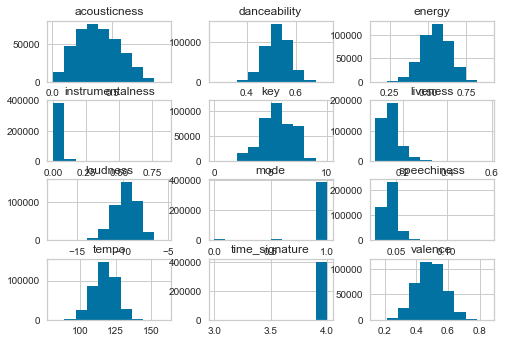

In [301]:
df_agg_training.hist()

## Valence:  (x >= .50 => 176965) ,  (x >= .52  =>  142684), (x >= .60 => 41709)
## Energy:  (x >= .50 => 143239)  , (x >= .60  =>  66969) ,    (x >= .70 => 11272)
## Dance:    (x >= .50 => 115251) ,  (x >= .55  =>  23194) , (x >= .60 => 357)
## Acoustic:  (x >= .10 => 110334) ,  (x >= .20  =>  15501) ,  (x >= .30 => 72)

## Good or Bad Playlist Based on Review and Personal Perspectives

In [302]:
#lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='0320_2020_nlp.csv')

audiofeatures = get_file(s3,'s3ssp',download_file='Analysis_Data/playlist_level_train_dataset.csv',rename_file='a_playlist_training_dataset.csv')


df1 = pd.read_csv(audiofeatures,sep='|')
df1






,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,playlist0,0.5420,0.6420,5.0,-7.9055,1.0,0.05155,0.3585,0.007180,0.1240,0.4615,112.0820,4.0
1,playlist1,0.5050,0.4750,6.0,-11.0685,1.0,0.04800,0.2920,0.009925,0.1660,0.4200,125.5995,4.0
2,playlist10,0.5355,0.4930,6.5,-11.7780,0.5,0.04400,0.2595,0.102900,0.1440,0.4500,112.0990,4.0
3,playlist100,0.4815,0.4595,3.5,-10.9390,1.0,0.04325,0.3290,0.001034,0.1315,0.4035,117.3075,4.0
4,playlist1000,0.5075,0.4600,5.0,-13.0555,1.0,0.03935,0.4920,0.003140,0.1340,0.3710,101.9970,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401061,playlist99995,0.4525,0.3930,4.0,-9.0745,1.0,0.04195,0.6525,0.001740,0.1130,0.3490,119.6630,4.0
401062,playlist99996,0.4940,0.6540,4.0,-10.3985,1.0,0.04010,0.2640,0.006815,0.1430,0.4590,122.1440,4.0
401063,playlist99997,0.5880,0.5430,6.5,-8.6155,1.0,0.04120,0.4925,0.001834,0.1155,0.4895,113.1720,4.0
401064,playlist99998,0.4700,0.6015,5.0,-8.2650,1.0,0.04200,0.4260,0.000066,0.1140,0.5120,125.7970,4.0


In [303]:
df1.count()

playlist            401066
danceability        401066
energy              401066
key                 401066
loudness            401066
mode                401066
speechiness         401066
acousticness        401066
instrumentalness    401066
liveness            401066
valence             401066
tempo               401066
time_signature      401066
dtype: int64

In [327]:
good_playlist_df_median = df1[(df1['valence']>=.45) & (df1['energy']>=.65) 
                              & (df1['danceability']>=.52)
                             ]
good_playlist_df_median.head()


good_playlist_df_median.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.0
mean,0.561028,0.690956,5.354792,-8.431253,0.963589,0.046499,0.232905,0.010154,0.155902,0.566429,118.914082,4.0
std,0.029494,0.033833,1.375360,0.946809,0.164027,0.007201,0.120221,0.032442,0.042160,0.066592,7.370879,0.0
min,0.520000,0.650000,0.000000,-12.905000,0.000000,0.030550,0.005860,0.000000,0.085450,0.450000,88.874500,4.0
25%,0.537000,0.664500,4.500000,-9.049500,1.000000,0.041550,0.143000,0.000264,0.125000,0.515000,114.165000,4.0
50%,0.556000,0.682500,5.500000,-8.388500,1.000000,0.045250,0.214000,0.001240,0.145000,0.560500,119.431000,4.0
75%,0.579000,0.709500,6.500000,-7.763500,1.000000,0.050050,0.305500,0.005827,0.175500,0.611500,123.856000,4.0
max,0.713500,0.876500,9.500000,-5.260000,1.000000,0.131000,0.757500,0.676000,0.484500,0.853000,147.363500,4.0


In [328]:
df_copy = df1.copy()
df_bad = pd.concat([df_copy,good_playlist_df_median],sort=False)
df_bad_update = df_bad.drop_duplicates('playlist',keep=False)
df_bad_update.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.00000,373533.000000
mean,0.519431,0.541403,5.283599,-9.761419,0.968499,0.043830,0.391019,0.017313,0.147498,0.481878,116.95594,3.999950
std,0.048402,0.083309,1.376396,1.267419,0.152255,0.006163,0.170130,0.050413,0.038003,0.088197,8.24545,0.005488
min,0.268000,0.157500,0.000000,-17.680000,0.000000,0.029550,0.004030,0.000000,0.076500,0.141000,80.74300,3.000000
25%,0.487500,0.485500,4.500000,-10.564500,1.000000,0.039600,0.260000,0.000417,0.121000,0.420000,111.46600,4.000000
50%,0.519000,0.544000,5.000000,-9.684500,1.000000,0.042750,0.381500,0.002081,0.137000,0.482000,117.34950,4.000000
75%,0.552500,0.600000,6.500000,-8.875500,1.000000,0.046850,0.514500,0.010205,0.162500,0.542500,122.54200,4.000000
max,0.725500,0.893000,10.000000,-5.350500,1.000000,0.141000,0.945000,0.852500,0.584000,0.841000,160.33500,4.000000


In [329]:
bad_playlist_df_median = df_bad_update[(df_bad_update['valence']<.45) | (df_bad_update['energy']<.65)  
                                          | (df_bad_update['danceability']<.52)
                             ]
bad_playlist_df_median.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.00000,373533.000000
mean,0.519431,0.541403,5.283599,-9.761419,0.968499,0.043830,0.391019,0.017313,0.147498,0.481878,116.95594,3.999950
std,0.048402,0.083309,1.376396,1.267419,0.152255,0.006163,0.170130,0.050413,0.038003,0.088197,8.24545,0.005488
min,0.268000,0.157500,0.000000,-17.680000,0.000000,0.029550,0.004030,0.000000,0.076500,0.141000,80.74300,3.000000
25%,0.487500,0.485500,4.500000,-10.564500,1.000000,0.039600,0.260000,0.000417,0.121000,0.420000,111.46600,4.000000
50%,0.519000,0.544000,5.000000,-9.684500,1.000000,0.042750,0.381500,0.002081,0.137000,0.482000,117.34950,4.000000
75%,0.552500,0.600000,6.500000,-8.875500,1.000000,0.046850,0.514500,0.010205,0.162500,0.542500,122.54200,4.000000
max,0.725500,0.893000,10.000000,-5.350500,1.000000,0.141000,0.945000,0.852500,0.584000,0.841000,160.33500,4.000000


In [330]:
good_playlist_df_median['target'] = '1'
good_playlist_df_median.describe()

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.000000,27533.0
mean,0.561028,0.690956,5.354792,-8.431253,0.963589,0.046499,0.232905,0.010154,0.155902,0.566429,118.914082,4.0
std,0.029494,0.033833,1.375360,0.946809,0.164027,0.007201,0.120221,0.032442,0.042160,0.066592,7.370879,0.0
min,0.520000,0.650000,0.000000,-12.905000,0.000000,0.030550,0.005860,0.000000,0.085450,0.450000,88.874500,4.0
25%,0.537000,0.664500,4.500000,-9.049500,1.000000,0.041550,0.143000,0.000264,0.125000,0.515000,114.165000,4.0
50%,0.556000,0.682500,5.500000,-8.388500,1.000000,0.045250,0.214000,0.001240,0.145000,0.560500,119.431000,4.0
75%,0.579000,0.709500,6.500000,-7.763500,1.000000,0.050050,0.305500,0.005827,0.175500,0.611500,123.856000,4.0
max,0.713500,0.876500,9.500000,-5.260000,1.000000,0.131000,0.757500,0.676000,0.484500,0.853000,147.363500,4.0


In [331]:
bad_playlist_df_median['target']='0'
bad_playlist_df_median.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.000000,373533.00000,373533.000000
mean,0.519431,0.541403,5.283599,-9.761419,0.968499,0.043830,0.391019,0.017313,0.147498,0.481878,116.95594,3.999950
std,0.048402,0.083309,1.376396,1.267419,0.152255,0.006163,0.170130,0.050413,0.038003,0.088197,8.24545,0.005488
min,0.268000,0.157500,0.000000,-17.680000,0.000000,0.029550,0.004030,0.000000,0.076500,0.141000,80.74300,3.000000
25%,0.487500,0.485500,4.500000,-10.564500,1.000000,0.039600,0.260000,0.000417,0.121000,0.420000,111.46600,4.000000
50%,0.519000,0.544000,5.000000,-9.684500,1.000000,0.042750,0.381500,0.002081,0.137000,0.482000,117.34950,4.000000
75%,0.552500,0.600000,6.500000,-8.875500,1.000000,0.046850,0.514500,0.010205,0.162500,0.542500,122.54200,4.000000
max,0.725500,0.893000,10.000000,-5.350500,1.000000,0.141000,0.945000,0.852500,0.584000,0.841000,160.33500,4.000000


In [332]:
df_train = pd.concat([bad_playlist_df_median,good_playlist_df_median])
df_train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000,401066.000000
mean,0.522286,0.551670,5.288486,-9.670103,0.968162,0.044014,0.380164,0.016822,0.148075,0.487682,117.090366,3.999954
std,0.048500,0.089289,1.376441,1.292572,0.153097,0.006276,0.171895,0.049422,0.038362,0.089478,8.203346,0.005296
min,0.268000,0.157500,0.000000,-17.680000,0.000000,0.029550,0.004030,0.000000,0.076500,0.141000,80.743000,3.000000
25%,0.490000,0.490500,4.500000,-10.491500,1.000000,0.039700,0.246500,0.000402,0.121000,0.425500,111.638500,4.000000
50%,0.523000,0.552000,5.000000,-9.595500,1.000000,0.042950,0.368500,0.002005,0.137500,0.488000,117.501500,4.000000
75%,0.555500,0.614000,6.500000,-8.765000,1.000000,0.047050,0.504500,0.009839,0.163500,0.549000,122.641375,4.000000
max,0.725500,0.893000,10.000000,-5.260000,1.000000,0.141000,0.945000,0.852500,0.584000,0.853000,160.335000,4.000000


In [333]:
df_train.sample(5)

,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,target
57888,playlist152096,0.5210,0.5345,4.0,-9.2125,1.0,0.04235,0.2140,0.000159,0.1520,0.5260,121.9770,4.0,0
95492,playlist185940,0.4350,0.4360,7.0,-11.6695,1.0,0.04055,0.6245,0.000276,0.1780,0.4240,117.3165,4.0,0
323949,playlist391551,0.5005,0.6970,6.5,-8.4755,1.0,0.03925,0.0563,0.004710,0.1100,0.5485,129.6135,4.0,0
293939,playlist364542,0.5610,0.6370,7.0,-9.3900,1.0,0.04835,0.1640,0.009640,0.1830,0.5665,114.2285,4.0,0
112954,playlist201655,0.5120,0.5565,5.5,-9.8870,1.0,0.03590,0.2530,0.001360,0.1425,0.4855,121.2055,4.0,0


In [334]:
df_train.to_csv('new_master_train_playlist.csv',sep='|',index=False)

In [335]:
from s3 import upload_file
import boto3
s3 = boto3.resource('s3')
upload_file(s3,'s3ssp',upload_file='new_master_train_playlist.csv'
            ,rename_file='Analysis_Data/new_master_train_playlist.csv')

'Analysis_Data/new_master_train_playlist.csv'